In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Carregar o DataFrame limpo
df = pd.read_csv("StudentPerformance_limpo.csv")

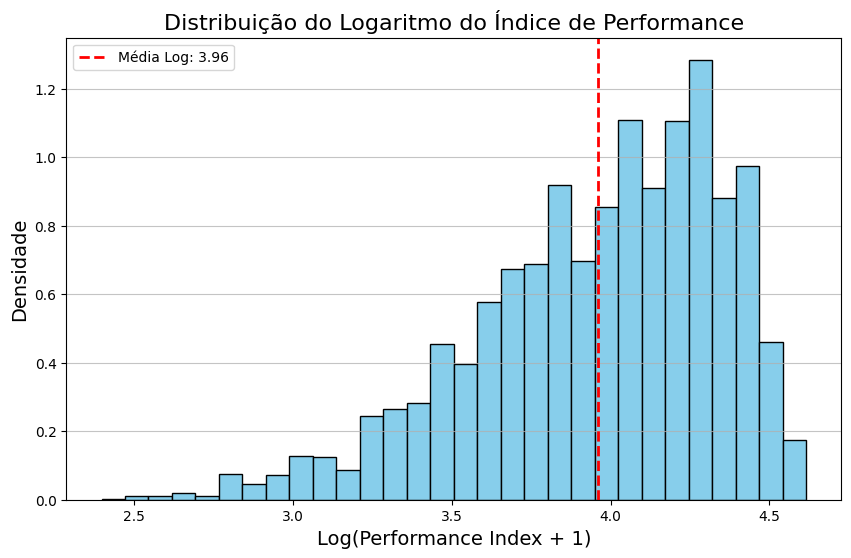

In [ ]:
'''
1. **Distribuição da Performance Index**: Crie um histograma para visualizar a distribuição da coluna `Performance Index` 
após a transformação logarítmica.
'''
# Aplicação da Transformação Logarítmica
# np.log1p, que calcula log(1 + x)
log_performance_index = np.log1p(df['Performance_Index'])

# Geração do Histograma
plt.figure(figsize=(10, 6))

# 'bins=30' define o número de barras.
# 'density=True' garante que a área total do histograma seja 1 
plt.hist(
    log_performance_index, 
    bins=30, 
    color='skyblue', 
    edgecolor='black',
    density=True 
)

# Adicionar a linha de média para referência
mean_log = log_performance_index.mean()
plt.axvline(mean_log, color='red', linestyle='dashed', linewidth=2, label=f'Média Log: {mean_log:.2f}')

# Adicionar título e rótulos
plt.title('Distribuição do Logaritmo do Índice de Performance', fontsize=16)
plt.xlabel('Log(Performance Index + 1)', fontsize=14)
plt.ylabel('Densidade', fontsize=14)
plt.legend()
plt.grid(axis='y', alpha=0.75) 

# Mostrar o gráfico
plt.show()

C:\Users\rafae\AppData\Local\Temp\ipykernel_22544\1950942564.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


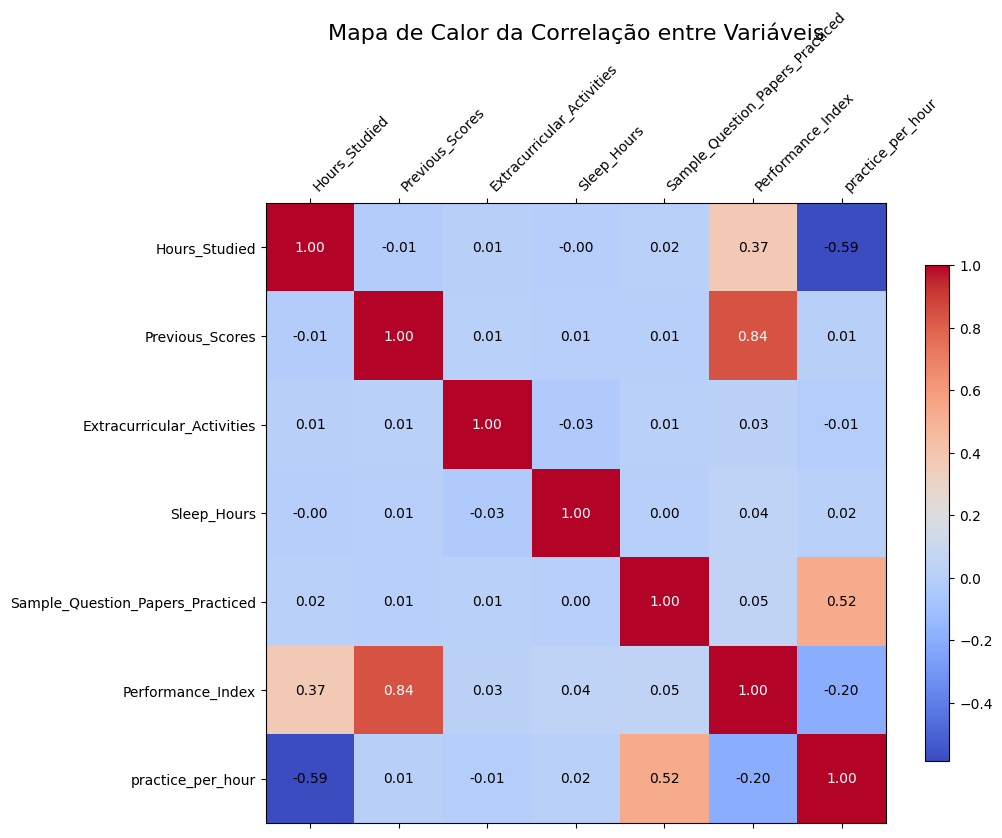

In [ ]:
'''
2. **Correlação entre Variáveis**: Utilize um mapa de calor (heatmap) para visualizar a correlação entre as variáveis 
numéricas do DataFrame, destacando a relação com a coluna `Performance Index`.
'''

# Calcular a matriz de correlação
corr_matrix = df.corr()
columns = corr_matrix.columns.tolist()

# Configurar a figura e o heatmap (usando matshow)
plt.figure(figsize=(10, 8))
plt.matshow(corr_matrix, cmap='coolwarm', fignum=1) 

# Adicionar barra de cores
plt.colorbar(shrink=0.8)

# Adicionar rótulos (nomes das colunas)
plt.xticks(range(len(columns)), columns, rotation=45, ha='left', fontsize=10)
plt.yticks(range(len(columns)), columns, fontsize=10)

# Adicionar valores de correlação 
for i in range(len(columns)):
    for j in range(len(columns)):
        text = f"{corr_matrix.iloc[i, j]:.2f}"
        color = 'black' if abs(corr_matrix.iloc[i, j]) < 0.6 else 'white'
        plt.text(j, i, text, ha="center", va="center", color=color, fontsize=10)

# Adicionar título e ajustar layout
plt.title('Mapa de Calor da Correlação entre Variáveis', y=1.25, fontsize=16) 
plt.tight_layout()

plt.show()

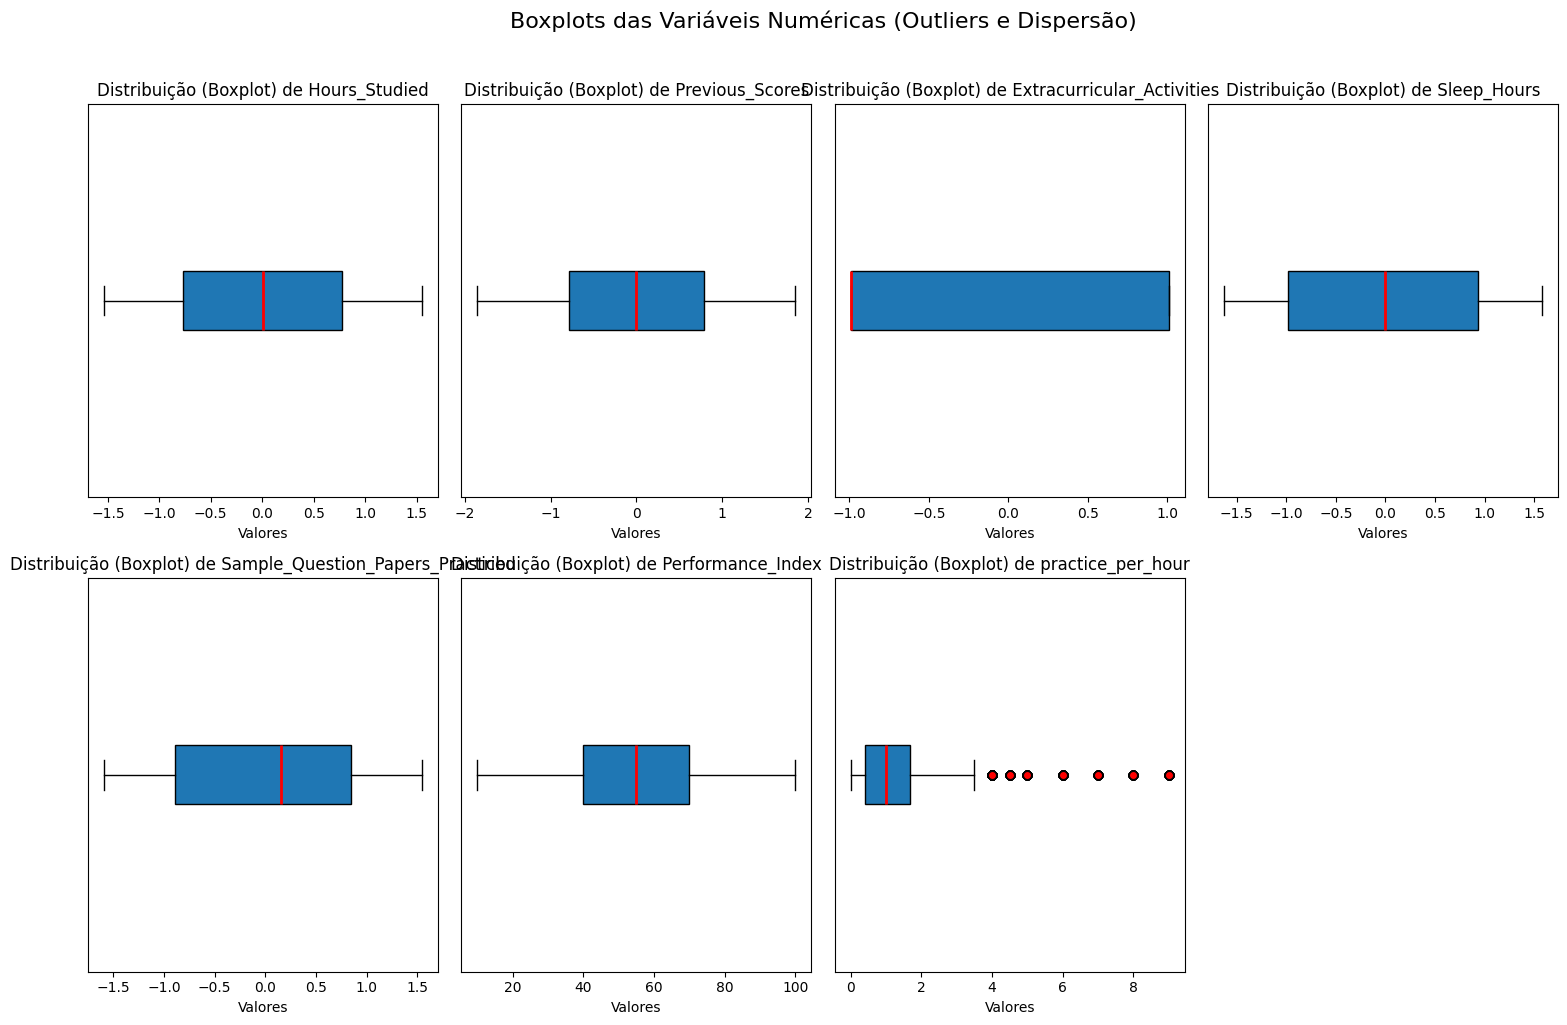

In [ ]:
'''
3. **Boxplot de Variáveis Numéricas**: Gere boxplots para 
visualizar a distribuição das variáveis numéricas, identificando possíveis outliers e a dispersão dos dados.
'''

# Selecionar as colunas numéricas
numeric_cols = [
    'Hours_Studied', 
    'Previous_Scores', 
    'Extracurricular_Activities', 
    'Sleep_Hours',
    'Sample_Question_Papers_Practiced', 
    'Performance_Index', 
    'practice_per_hour'
]

data_to_plot = df[numeric_cols]

# Configurar a figura com subplots
n_cols = 4 
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# Gerar o Boxplot para cada coluna
for i, col in enumerate(numeric_cols):
    ax = axes[i]
    ax.boxplot(data_to_plot[col], vert=False, patch_artist=True, 
               medianprops={'color': 'red', 'linewidth': 2},
               flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 6, 'linestyle': 'none'})
    
    ax.set_title(f'Distribuição (Boxplot) de {col}', fontsize=12)
    ax.set_xlabel('Valores', fontsize=10)
    ax.tick_params(axis='y', left=False, labelleft=False)

# Remover subplots vazios
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar o layout
fig.suptitle('Boxplots das Variáveis Numéricas (Outliers e Dispersão)', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()